In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for drawing pictures
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression




In [55]:
# reading the csv
zillow = pd.read_csv('/Users/amshu/Desktop/Zillow/Kaggle/Zillow.csv')
zillow

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,target
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13,-0.002245
77609,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,...,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13,0.020615
77610,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,...,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13,0.013209
77611,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,NaN,...,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13,0.037129


In [56]:
# loading informaition of the dataset
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   airconditioningtypeid         25007 non-null  float64
 2   architecturalstyletypeid      207 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77579 non-null  float64
 5   bedroomcnt                    77579 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49809 non-null  float64
 8   calculatedbathnbr             76963 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6037 non-null   float64
 11  calculatedfinishedsquarefeet  77378 non-null  float64
 12  finishedsquarefeet12          73923 non-null  float64
 13  f

In [57]:
# removing columns having only one value or 0% of the
# rows as null values.
to_remove = []
for column in zillow.columns:

    if zillow[column].nunique() == 1:
        to_remove.append(column)

    elif (zillow[column].isnull()).mean() >= 0.50:
        to_remove.append(column)

print(len(to_remove))

30


In [58]:
zillow.drop(to_remove, axis = 1, inplace = True)
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   bathroomcnt                   77579 non-null  float64
 2   bedroomcnt                    77579 non-null  float64
 3   buildingqualitytypeid         49809 non-null  float64
 4   calculatedbathnbr             76963 non-null  float64
 5   calculatedfinishedsquarefeet  77378 non-null  float64
 6   finishedsquarefeet12          73923 non-null  float64
 7   fips                          77579 non-null  float64
 8   fullbathcnt                   76963 non-null  float64
 9   heatingorsystemtypeid         49571 non-null  float64
 10  latitude                      77579 non-null  float64
 11  longitude                     77579 non-null  float64
 12  lotsizesquarefeet             69321 non-null  float64
 13  p

parcelid                            0
bathroomcnt                        34
bedroomcnt                         34
buildingqualitytypeid           27804
calculatedbathnbr                 650
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
fips                               34
fullbathcnt                       650
heatingorsystemtypeid           28042
latitude                           34
longitude                          34
lotsizesquarefeet                8292
propertycountylandusecode          34
propertylandusetypeid              34
propertyzoningdesc              27137
rawcensustractandblock             34
regionidcity                     1506
regionidcounty                     34
regionidzip                        84
roomcnt                            34
unitcnt                         26910
yearbuilt                         304
structuretaxvaluedollarcnt        149
taxvaluedollarcnt                  35
landtaxvaluedollarcnt              36
taxamount   

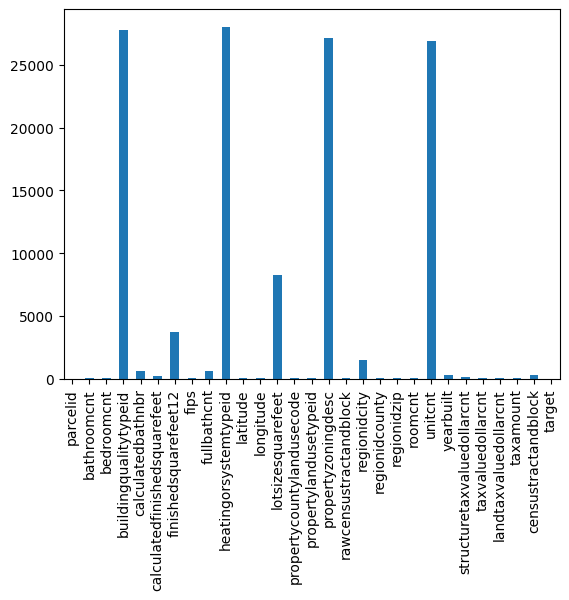

In [59]:

zillow.isnull().sum().plot.bar()
print(zillow.isnull().sum())
plt.show()

In [60]:
# describes all the statistics we need to replace the values with
zillow.describe()


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,target
count,7.761300e+04,77579.000000,77579.000000,49809.000000,76963.000000,77378.000000,73923.000000,77579.000000,76963.000000,49571.000000,...,77529.000000,77579.000000,50703.000000,77309.000000,7.746400e+04,7.757800e+04,7.757700e+04,77574.000000,7.733200e+04,77613.000000
mean,1.300781e+07,2.298496,3.053223,6.533779,2.316392,1784.935421,1760.284553,6048.814151,2.250107,3.921749,...,96586.692812,1.476276,1.110309,1968.611507,1.892811e+05,4.901506e+05,3.011515e+05,5995.961788,6.049667e+13,0.016755
std,3.518717e+06,0.996732,1.140480,1.722062,0.979689,954.250373,934.352566,20.747252,0.966492,3.594780,...,3793.552065,2.823686,1.169967,23.793171,2.304107e+05,6.537979e+05,4.927249e+05,7628.859728,1.533339e+12,0.170887
min,1.071186e+07,0.000000,0.000000,1.000000,1.000000,128.000000,128.000000,6037.000000,1.000000,1.000000,...,95982.000000,0.000000,1.000000,1824.000000,4.400000e+01,1.000000e+03,1.610000e+02,19.920000,6.037101e+13,-4.655420
25%,1.153821e+07,2.000000,2.000000,6.000000,2.000000,1182.000000,1172.000000,6037.000000,2.000000,2.000000,...,96193.000000,0.000000,1.000000,1953.000000,8.417925e+04,2.068985e+05,8.529300e+04,2712.630000,6.037311e+13,-0.024325
50%,1.253004e+07,2.000000,3.000000,6.000000,2.000000,1542.000000,1523.000000,6037.000000,2.000000,2.000000,...,96389.000000,0.000000,1.000000,1970.000000,1.364045e+05,3.588785e+05,2.031880e+05,4448.265000,6.037603e+13,0.006670
75%,1.421101e+07,3.000000,4.000000,8.000000,3.000000,2112.000000,2075.000000,6059.000000,3.000000,7.000000,...,96987.000000,0.000000,1.000000,1987.000000,2.187340e+05,5.690000e+05,3.667530e+05,6926.917500,6.059042e+13,0.039295
max,1.676893e+08,18.000000,16.000000,12.000000,18.000000,35640.000000,21929.000000,6111.000000,18.000000,24.000000,...,399675.000000,15.000000,237.000000,2016.000000,1.142179e+07,4.906124e+07,4.895220e+07,586639.300000,4.830301e+14,5.262999


In [61]:
for column in zillow.columns:
    # if zillow[column].dtype == np.number: tried this and showed error
    # imported pandas api types and is_numeric_dtype
    if pd.api.types.is_numeric_dtype(zillow[column]):
        zillow[column] = zillow[column].fillna(zillow[column].mean())
    else:
        zillow[column] = zillow[column].fillna(zillow[column].mode()[0])

zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   bathroomcnt                   77613 non-null  float64
 2   bedroomcnt                    77613 non-null  float64
 3   buildingqualitytypeid         77613 non-null  float64
 4   calculatedbathnbr             77613 non-null  float64
 5   calculatedfinishedsquarefeet  77613 non-null  float64
 6   finishedsquarefeet12          77613 non-null  float64
 7   fips                          77613 non-null  float64
 8   fullbathcnt                   77613 non-null  float64
 9   heatingorsystemtypeid         77613 non-null  float64
 10  latitude                      77613 non-null  float64
 11  longitude                     77613 non-null  float64
 12  lotsizesquarefeet             77613 non-null  float64
 13  p

In [62]:
# changing the column value for columns which have objects datatype in them
objects=['propertycountylandusecode','propertyzoningdesc']
for column in objects:
    le = LabelEncoder()
    zillow[column] = le.fit_transform(zillow[column])



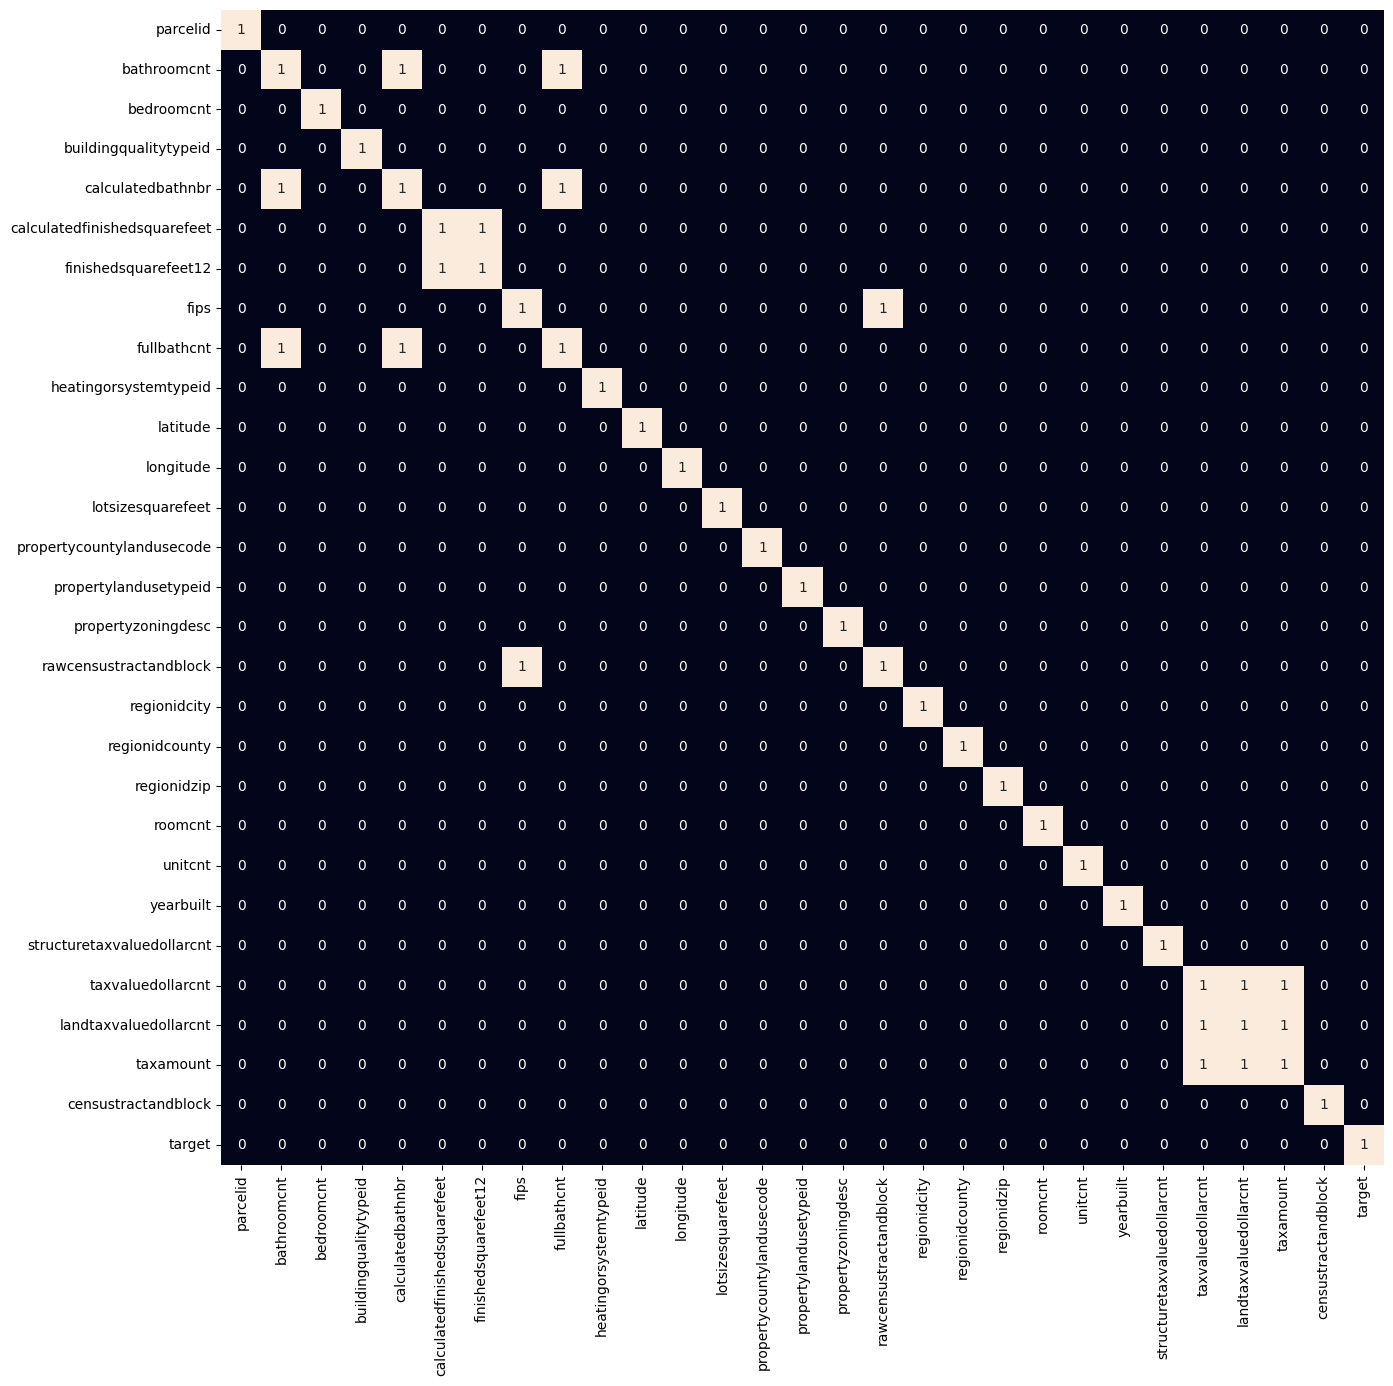

In [63]:
plt.figure(figsize=(15, 15))
sb.heatmap(zillow.corr() > 0.8,annot=True,cbar=False)
plt.show()

In [64]:
# removing the columns that are highly corelated
zillow.drop(['calculatedbathnbr','fullbathcnt','fips','calculatedfinishedsquarefeet',
             'taxvaluedollarcnt','landtaxvaluedollarcnt'],axis=1, inplace = True)

In [65]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcelid                    77613 non-null  int64  
 1   bathroomcnt                 77613 non-null  float64
 2   bedroomcnt                  77613 non-null  float64
 3   buildingqualitytypeid       77613 non-null  float64
 4   finishedsquarefeet12        77613 non-null  float64
 5   heatingorsystemtypeid       77613 non-null  float64
 6   latitude                    77613 non-null  float64
 7   longitude                   77613 non-null  float64
 8   lotsizesquarefeet           77613 non-null  float64
 9   propertycountylandusecode   77613 non-null  int64  
 10  propertylandusetypeid       77613 non-null  float64
 11  propertyzoningdesc          77613 non-null  int64  
 12  rawcensustractandblock      77613 non-null  float64
 13  regionidcity                776

In [66]:
# determining x features and y target.

In [67]:
target = zillow['target']
target.info

<bound method Series.info of 0        0.025595
1        0.055619
2        0.005383
3       -0.103410
4        0.006940
           ...   
77608   -0.002245
77609    0.020615
77610    0.013209
77611    0.037129
77612    0.007204
Name: target, Length: 77613, dtype: float64>

In [68]:
features = zillow.drop(['target'], axis = 1)
features.info

<bound method DataFrame.info of        parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0      14297519          3.5         4.0               6.533779   
1      17052889          1.0         2.0               6.533779   
2      14186244          2.0         3.0               6.533779   
3      12177905          3.0         4.0               8.000000   
4      10887214          3.0         3.0               8.000000   
...         ...          ...         ...                    ...   
77608  10833991          3.0         3.0               8.000000   
77609  11000655          2.0         2.0               6.000000   
77610  17239384          2.0         4.0               6.533779   
77611  12773139          1.0         3.0               4.000000   
77612  12826780          2.0         3.0               6.000000   

       finishedsquarefeet12  heatingorsystemtypeid    latitude    longitude  \
0                    3100.0               3.921749  33634931.0 -117869207.0   
1    

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state = 100)


In [70]:
# check the shape of the test and train
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69851, 22), (7762, 22), (69851,), (7762,))

In [71]:
# normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [73]:
#train the model / fit the model
model.fit(X_train, y_train)

LinearRegression()

In [74]:
model.intercept_

np.float64(0.016810570580403486)

In [75]:
model.coef_

array([ 2.33758031e-03, -1.10158248e-03,  5.32732677e-04, -5.55841424e-03,
        1.46795393e-02, -1.80137923e-03, -6.98141029e-04,  1.74996080e-03,
        3.08932342e-03,  2.20441442e-03,  1.74822156e-03, -9.04784128e-04,
       -1.95227518e-03,  3.40994822e-04,  2.11000708e-03, -6.33974332e-04,
        1.26985297e-03,  3.41055516e-05,  3.47713485e-04, -5.11644450e-03,
       -2.35224839e-03,  6.71782807e-04])

In [76]:
y_pred = model.predict(X_test)

In [77]:
y_pred

array([0.00986624, 0.01089803, 0.01288673, ..., 0.01863692, 0.02797356,
       0.02846401])

In [78]:
#model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [79]:
mean_absolute_error(y_test, y_pred)

0.07025564410441254

In [80]:
mean_absolute_percentage_error(y_test,y_pred)


2.995477766027127

In [81]:
mean_squared_error(y_test,y_pred)


0.027000899169862373